In [870]:
import sys
sys.path.insert(0,'../')

In [871]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import helper

In [872]:
data = pd.read_csv('stroke-data.csv')

In [873]:
data.shape

(5110, 12)

In [874]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [875]:
data.describe()
###
# average age of man who had stroke=43
# 25th percentile age is 25, 50th is 45, 75th is 61 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [876]:
data.drop(['id'],inplace=True,axis=1)

In [877]:
data.isna().sum()
##only bmi is missing

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

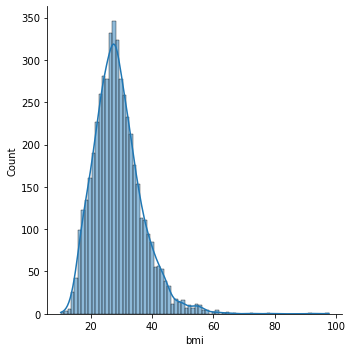

In [878]:
sns.displot(data.bmi,kde=True) ##looks almost normal distribution

In [879]:
data.age.mean(),data.age.median(),data.age.std()

(43.226614481409015, 45.0, 22.61264672311352)

<AxesSubplot:xlabel='age', ylabel='bmi'>

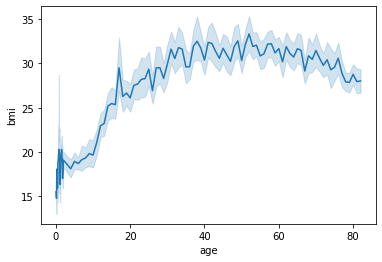

In [880]:
sns.lineplot(x='age',y='bmi',data=data)
#as the age goes up, bmi goes up - in a linear fashion

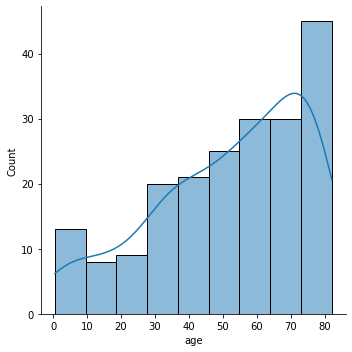

In [881]:
sns.displot(data.loc[data.bmi.isna()].age,kde="True")
#to fill in na bmi data
#option1: find mean bmi by age_groups like 0-10,10-20,20-30,30-45,46-55,55-75,75-100
#option2: use linear regression to find as there is linear relation between age and bmi
#option3: drop na for bmi samples

In [882]:
#data.dropna(inplace=True,axis=0)

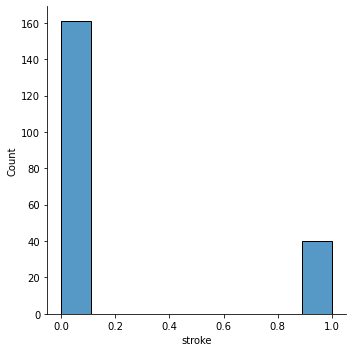

In [883]:
sns.displot(data.loc[data.bmi.isna()==True].stroke)

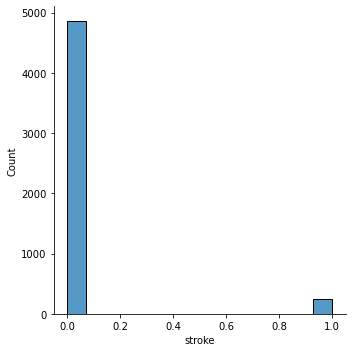

In [884]:
sns.displot(data.stroke)
#since there is minority data of target variable class=1 in the population, instead of dropping missing data for bmi. need to 
#find missing values

In [885]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [886]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [887]:
helper.replace_classes(data,["gender","ever_married","work_type","Residence_type","smoking_status"],[
    {"Female":0,"Male":1,"Other":2},
    {"No":0,"Yes":1},
    {"Private":0,"Self-employed":1,"Govt_job":2,"children":3,"Never_worked":4},
    {"Urban":0,"Rural":1},
    {"formerly smoked":0,"never smoked":1,"smokes":2,"children":3,"Unknown":4}
])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,0,1
1,0,61.0,0,0,1,1,1,202.21,NaN,1,1
2,1,80.0,0,1,1,0,1,105.92,32.5,1,1
3,0,49.0,0,0,1,0,0,171.23,34.4,2,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,NaN,1,0
5106,0,81.0,0,0,1,1,0,125.20,40.0,1,0
5107,0,35.0,0,0,1,1,1,82.99,30.6,1,0
5108,1,51.0,0,0,1,0,1,166.29,25.6,0,0


<AxesSubplot:xlabel='gender', ylabel='age'>

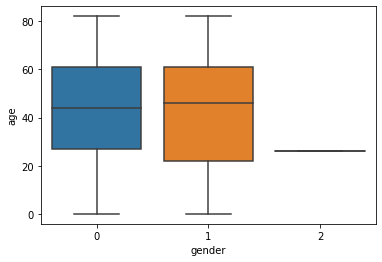

In [888]:
sns.boxplot(x="gender",y="age",data=data)

<AxesSubplot:xlabel='gender', ylabel='age'>

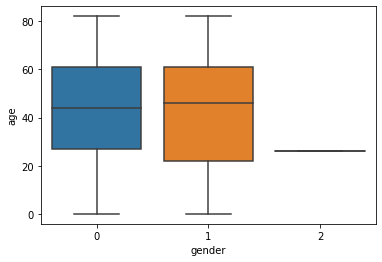

In [889]:
sns.boxplot(x="gender",y="age",data=data)

<AxesSubplot:ylabel='avg_glucose_level'>

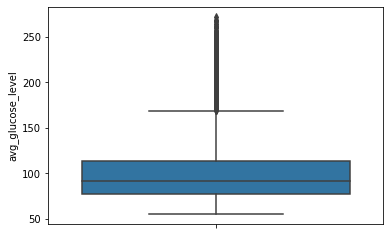

In [890]:
sns.boxplot(y="avg_glucose_level",data=data)

<AxesSubplot:ylabel='bmi'>

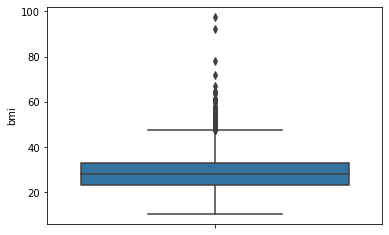

In [891]:
sns.boxplot(y="bmi",data=data)
#lot of outliers in bmi & glucoselevel features
#real life scenario-bmi to have more than the Q3+1.5*IQR is highly unlikely(rare)
#as with the above linear trend on age vs bmi, we can use age as a factor to identify missing bmi
#trail 1: use linear regression where the target feature would be bmi(to find missing bmi)

In [892]:
#trail#1 - bmi outliers treatment - handle outliers by replacing with the respective quartile 
#end values with added limit = Q +or- 1.5*IQR
#75th quartile -> 33.10 
#25th quartile -> 23.50
#upper limit 
upper_limit = 33.10 + 1.5*(33.10-23.50)
lower_limit = 23.50 - 1.5*(33.10-23.50)

data.loc[data.bmi>upper_limit,'bmi']=upper_limit
data.loc[data.bmi<lower_limit,'bmi']=lower_limit
#with this data imputation mse ~= 47 and bmi were predicted with less accuracy


In [893]:
#trail#2 - bmi outliers treatment - handle outliers by replacing with mean
#data.loc[(data.bmi>upper_limit) | (data.bmi<lower_limit) ,'bmi']=data.bmi.mean()

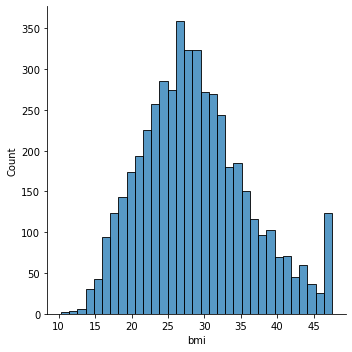

In [894]:
sns.displot(data.bmi)

<AxesSubplot:ylabel='bmi'>

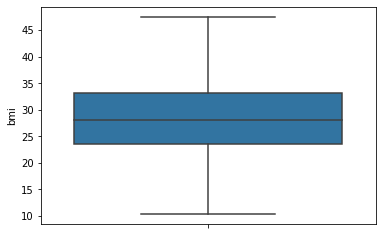

In [895]:
sns.boxplot(y="bmi",data=data)

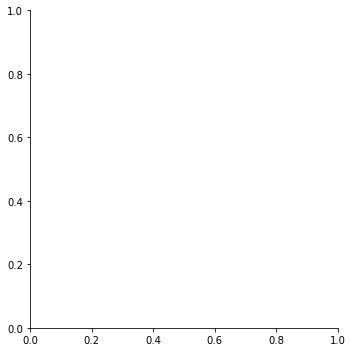

In [896]:
sns.displot(data.loc[data.bmi>=55].stroke)

In [897]:
groups = data.groupby(['gender','stroke']).groups
lst=[]
for gender,stroke in groups:
    lst.append({'gender':gender,'stroke':stroke,'count':len(groups[(gender,stroke)])})
grp_df=pd.DataFrame(lst)

<AxesSubplot:xlabel='stroke', ylabel='count'>

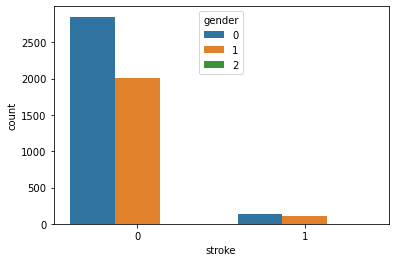

In [898]:
#stroke by gender
sns.barplot(x="stroke",y="count",data=grp_df,hue="gender")

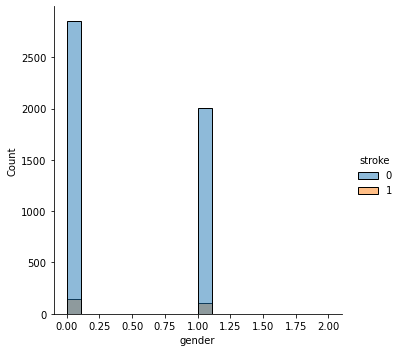

In [899]:
sns.displot(x="gender",hue="stroke",data=data)
#population has more of gender 0(female) samples compared to other
#but the outcome with stroke=1 is similar(or looks almost equal) among both male and female genders. and just 1 stroke whos gender=2

In [900]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,0,1
1,0,61.0,0,0,1,1,1,202.21,NaN,1,1
2,1,80.0,0,1,1,0,1,105.92,32.5,1,1
3,0,49.0,0,0,1,0,0,171.23,34.4,2,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1,1


<AxesSubplot:xlabel='stroke', ylabel='age'>

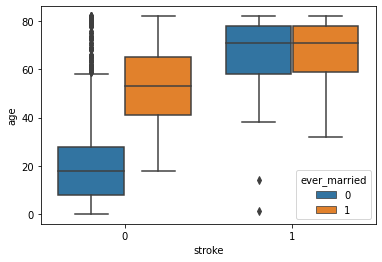

In [901]:
sns.boxplot(y="age",x="stroke",hue="ever_married",data=data)
##inference: if married, the average person age that is likely tohave stroke is around 65

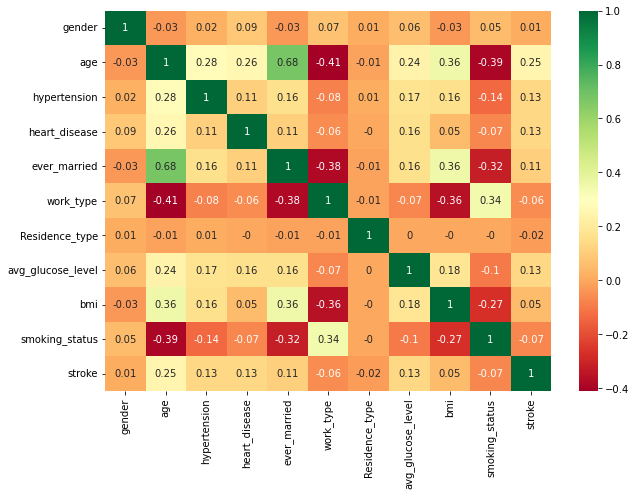

In [902]:
corr = data.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');
## age & ever_married have high +ve correlation and looks like age correlates more with stroke comparing the ever_married
#correlation (age is carrying more information) - so drop ever_married feature

In [903]:
data.drop(["ever_married"],inplace=True,axis=1)

In [904]:
#trail #1 - to find missing bmi using linear regression and just use the age as input feature
#train#2 - include gender as addition input feature and compare the results
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#bmi_features=['age']
#d_bmi = data.loc[data.bmi.isna()==False]
#d_no_bmi= data.loc[data.bmi.isna()==True]
#data_X=d_bmi[bmi_features]
#data_y=d_bmi.bmi
fltr=data.bmi.isna()
###this trail didn't add any addition value in accuracy
#train2, just fillna with mean of bmi
#data.loc[fltr==True,"bmi"]=data.loc[fltr==False].bmi.mean()

In [905]:
#data_X.age.mean(),data_X.age.median()

In [906]:
#data_X.head(),data_y.head()

In [907]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report

In [908]:
#x_train,x_cv,y_train,y_cv=train_test_split(data_X,data_y,test_size=0.25)

In [909]:
#reg =reg.fit(x_train,y_train)
#y_pred=reg.predict(x_train)
#print(f"error - {mean_squared_error(y_pred,y_train)}")

In [910]:
#reg.predict([[79]])

In [911]:
#if len(data.loc[fltr][bmi_features])>0:
    #data.loc[fltr,"bmi"]=reg.predict(data.loc[fltr][bmi_features])
data.bmi.fillna(data.bmi.mean(),inplace=True)

In [912]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [913]:
data[["bmi","stroke"]].corr()

,bmi,stroke
bmi,1.000000,0.044325
stroke,0.044325,1.000000


In [914]:
from sklearn.preprocessing import StandardScaler
scalr = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
scaled_d = scalr.fit_transform(data[['age','avg_glucose_level', 'bmi']])
d_f = pd.DataFrame(scaled_d,columns=cols)
d_f.head()

,age,avg_glucose_level,bmi
0,1.051434,2.706375,1.092742e+00
1,0.786070,2.121559,2.470697e-15
2,1.626390,-0.005028,5.224819e-01
3,0.255342,1.437358,7.867488e-01
4,1.582163,1.501184,-6.597649e-01


In [915]:
data.drop(cols,axis=1,inplace=True)
data = pd.concat([data,d_f],axis=1)

In [916]:
data.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age,avg_glucose_level,bmi
0,1,0,1,0,0,0,1,1.051434,2.706375,1.092742e+00
1,0,0,0,1,1,1,1,0.786070,2.121559,2.470697e-15
2,1,0,1,0,1,1,1,1.626390,-0.005028,5.224819e-01
3,0,0,0,0,0,2,1,0.255342,1.437358,7.867488e-01
4,0,1,0,1,1,1,1,1.582163,1.501184,-6.597649e-01


In [917]:
features =['gender', 'age', 'hypertension', 'heart_disease', 
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

data_X=data[features]
data_Y = data[["stroke"]]
data.columns

Index(['gender', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'smoking_status', 'stroke', 'age',
       'avg_glucose_level', 'bmi'],
      dtype='object')

In [918]:
data.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age,avg_glucose_level,bmi
0,1,0,1,0,0,0,1,1.051434,2.706375,1.092742e+00
1,0,0,0,1,1,1,1,0.786070,2.121559,2.470697e-15
2,1,0,1,0,1,1,1,1.626390,-0.005028,5.224819e-01
3,0,0,0,0,0,2,1,0.255342,1.437358,7.867488e-01
4,0,1,0,1,1,1,1,1.582163,1.501184,-6.597649e-01


In [919]:
X_train,X_test,y_train,y_test= train_test_split(data_X,data_Y,test_size=0.30,random_state=100)
y_train=y_train.values.reshape(y_train.shape[0],)
y_test=y_test.values.reshape(y_test.shape[0],)

In [920]:
X_train.shape,X_test.shape

((3577, 9), (1533, 9))

In [921]:
y_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [922]:
from sklearn.linear_model import LogisticRegression

In [923]:
logis_clf= LogisticRegression(max_iter=1000)
scores = cross_val_score(logis_clf,X_train,y_train,cv=5)
logis_score = scores.mean()

In [924]:
logis_score

0.9496784779466344

In [925]:
logis_clf=logis_clf.fit(X_train,y_train)

In [926]:
logis_clf.score(X_test,y_test)

0.9549902152641878

In [927]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf')
scores = cross_val_score(svm_clf,X_train,y_train,cv=5)
svm_score = scores.mean()

In [928]:
svm_score

0.9496784779466344

In [929]:
svm_clf=svm_clf.fit(X_train,y_train)

In [930]:
svm_clf.score(X_test,y_test)

0.9549902152641878

In [931]:
y_pred=logis_clf.predict(X_test)

In [932]:
print(confusion_matrix(**{'y_true':y_test,'y_pred':y_pred}))
print(classification_report(**{'y_true':y_test,'y_pred':y_pred}))

##### confusion metrix shows that, lot of false negatives(~69).which means model would simply report negative(no stroke) 
##for lot many people who had stroke

[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [933]:
from sklearn.naive_bayes import GaussianNB

In [934]:
nb=GaussianNB()
scores = cross_val_score(nb,X_train,y_train,cv=5)
nb_score = scores.mean()
print(nb_score)

0.863854748603352


In [935]:
nb=nb.fit(X_train,y_train)

In [936]:
y_pred=nb.predict(X_test)

In [937]:
print(confusion_matrix(**{'y_true':y_test,'y_pred':y_pred}))
print(classification_report(**{'y_true':y_test,'y_pred':y_pred}))

[[1302  162]
 [  30   39]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1464
           1       0.19      0.57      0.29        69

    accuracy                           0.87      1533
   macro avg       0.59      0.73      0.61      1533
weighted avg       0.94      0.87      0.90      1533

